In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import json
import numpy as np
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook'
import os
from urllib import request
import geodata as geo
%config Completer.use_jedi = False
from zipfile import ZipFile
import app_functions as app
import plotly.graph_objects as go

## Download Sectors

In [ ]:
list_ufs = ['PE', 'GO', 'AC','AL','AM','AP','BA','CE','DF','ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
#list_ufs = ['GO', 'AC']

In [ ]:
geo.donwload_sectors_shp_2010(ufs=list_ufs)

In [ ]:
geo.download_sector_statistics_2010(ufs=list_ufs)

In [ ]:
#for uf in ['TO', 'PE', 'GO', 'AC']:
for uf in ['AL','AM','AP','BA','CE','DF']:
    #,,'ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['ES','MA','MS','MT','PA','PB']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['MG']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['PI','PR','RN','RO','RR','SC','SE']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RJ']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RS']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['SP']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
def plot_density_map(gdf):

#    gdf.drop(labels=['CD_GEOCODM', 'NM_MUNICIP', 'CD_GEOCODB'], axis=1, inplace=True)
    gdf['Pop/ha'] = gdf['Pop/ha'].fillna(0).astype(np.int64)
    gdf['Hab/ha'] = pd.cut(gdf['Pop/ha'], bins=[0, 10,25,50,75,100,9999999], labels=['Até 10', '10 a 25', '25 a 50', '50 a 75', '75 a 100', 'acima de 100'])
    gdf['Hab/ha'].fillna('Até 10', inplace=True)

    
    lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
    lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

    minx, miny, maxx, maxy = gdf.total_bounds
    max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
    zoom = 12.7 - np.log(max_bound)

    fig_map = px.choropleth_mapbox(
        data_frame=gdf
        , geojson=gdf.geometry
    #    , featureidkey=gdf.index
        , locations=gdf.index
        , color='Hab/ha'
    #    , hover_name='CD_GEOCODI'
        , hover_data=None
        , zoom=zoom
        ,center={"lat": lat, "lon": lon}
        , mapbox_style="carto-positron"
        , title='<b>Densidade Demográfica<b>'
        , template=None
        , width=None
        , height=400
        , opacity=0.3
        , category_orders={'Hab/ha':['Até 10', '10 a 25', '25 a 50', '50 a 75', '75 a 100', 'acima de 100']}
        , color_discrete_sequence=px.colors.sequential.RdBu_r[5:]
        )
    
    fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))
    fig_map.layout.title.font.size = 18
    fig_map.update_traces(marker_line_width=0.1)

    return fig_map

In [ ]:
def load_sector_geodataframe(uf,cod_municipio):
    cod_municipio = str(cod_municipio)
    gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{cod_municipio}/{cod_municipio}.shp')
    return gdf

In [173]:
gdf = load_sector_geodataframe(uf='PR',cod_municipio=4125506);
lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

minx, miny, maxx, maxy = gdf.total_bounds
max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
zoom = 12.7 - np.log(max_bound)

2021-06-30 10:18:11.705 INFO    fiona.ogrext: Failed to auto identify EPSG: 7
C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [172]:
gdf

,Cod,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODM,NM_MUNICIP,Pop,Area,Pop/ha,geometry
0,412550605000042,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,873,12.80,68.19,"POLYGON ((-49.20986 -25.51795, -49.20885 -25.5..."
1,412550605000043,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,920,11.49,80.05,"POLYGON ((-49.20745 -25.51966, -49.20654 -25.5..."
2,412550605000044,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,854,17.27,49.46,"POLYGON ((-49.20441 -25.52579, -49.20405 -25.5..."
3,412550605000055,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,1084,13.90,78.00,"POLYGON ((-49.18772 -25.51141, -49.18732 -25.5..."
4,412550605000056,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,706,23.24,30.38,"POLYGON ((-49.18444 -25.51395, -49.18391 -25.5..."
...,...,...,...,...,...,...,...,...,...,...
281,412550625000005,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,1210,24.81,48.77,"POLYGON ((-49.17266 -25.60739, -49.17217 -25.6..."
282,412550625000006,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,1967,40.69,48.34,"POLYGON ((-49.17206 -25.60972, -49.17179 -25.6..."
283,412550625000007,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,2151,241.80,8.90,"POLYGON ((-49.17394 -25.59814, -49.17388 -25.5..."
284,412550625000008,URBANO,None,None,4125506,SÃO JOSÉ DOS PINHAIS,1426,20.39,69.95,"POLYGON ((-49.16593 -25.60026, -49.16679 -25.6..."


In [ ]:
fig = plot_density_map(gdf=gdf)

In [ ]:
gdf_dissolved = gdf.dissolve(by='NM_MUNICIP')

In [ ]:
gdf_dissolved

In [ ]:
fig2 = px.choropleth_mapbox(
    data_frame=gdf_dissolved
    , geojson=gdf_dissolved.geometry
#    , featureidkey=gdf.index
    , locations=gdf_dissolved.index
#    , color='Hab/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , color_discrete_sequence=['white']
#    , zoom=zoom
#    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title='<b>Densidade Demográfica<b>'
    , template=None
    , width=None
    , height=400
    , opacity=0.5
#    , category_orders={'Hab/ha':['Até 10', '10 a 25', '25 a 50', '50 a 75', '75 a 100', 'acima de 100']}
#    , color_discrete_sequence=px.colors.sequential.RdBu_r[5:]
    )

In [ ]:
municipality_json = gdf_dissolved.geometry.to_json()

In [ ]:
fig2

In [ ]:
gdf_dissolved.geometry.x

In [ ]:
list(gdf_dissolved.geometry[0].coords)

In [ ]:
go.Figure(data=go.Choroplethmapbox(geojson=gdf_dissolved.geometry.to_json()))

In [ ]:
gdf_dissolved.geometry.to_json()

In [ ]:
for x in gdf_dissolved.exterior:
    print(x)

In [ ]:
fig.add_trace(fig2.data[0])

In [ ]:
fig = plot_density_map(gdf=gdf)

In [ ]:
gdf_dissolved.geometry.to_dict()

In [ ]:
df = pd.read_json('teste_SJP1.geojson')

In [ ]:
gdf_dissolved.geometry.to_file("teste_SJP1.geojson", driver='GeoJSON', encoding='utf-8')

In [ ]:
import geojson
with open("teste_SJP.geojson") as f:
    gj = geojson.load(f)

In [164]:
coordinates = gj['features'][0]['geometry']['coordinates']

In [ ]:
{'layers': [{'source': df['features'][0]}]}

In [180]:
mapbox_test = {
     'style': 'carto-positron'
     ,'center': { 'lon': lon, 'lat': lat}
     ,'zoom': zoom
     , 'layers':[{'source': {
         'type': "FeatureCollection",
         'features': [{
             'type': "Feature"
             ,'geometry': {
                 'type': "MultiPolygon",
                 'coordinates':[coordinates]}}]}}]}

In [186]:
fig.update_layout(mapbox={geojson:gj['features']})

AttributeError: module 'geojson' has no attribute 'split'

In [ ]:
fig.data[0]

In [ ]:
fig.data[0]

## Urban Data 

In [ ]:
def load_urbrur_data():
    """
    Loads data from the file pop_urbano_rural_total_70_10.CSV into a Pandas DataFrame. Treats the data so it can be used as an argument to devise a line plot with the plot_urbrur_growth function.
    pop_urbano_rural_total_70_10.CSV must be in the folder data/pop/.
    """

    df = pd.read_csv(
        "data/pop/pop_urbano_rural_total_70_10.CSV",
        sep=";",
        dtype={
            "codmun": np.int32,
            "nomemun": "object",
            "ano": np.int32,
            "Total": np.int32,
            "Urbana": np.int32,
            "Rural": np.int32,
        },
    )
    df = df.melt(id_vars=["codmun", "nomemun", "ano"])
    df.columns = ["Código", "Município", "Ano", "Situação", "População"]

    return df

In [ ]:
df = load_urbrur_data()

In [ ]:
df

In [ ]:
def plot_density(gdf):
    lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
    lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

    minx, miny, maxx, maxy = gdf.total_bounds
    max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
    zoom = 13 - np.log(max_bound)

    fig_map = px.choropleth_mapbox(
        data_frame=gdf
        , geojson=gdf.geometry
    #    , featureidkey=gdf.index
        , locations=gdf.index
        , color='Pop/ha'
    #    , hover_name='CD_GEOCODI'
        , hover_data=None
        , zoom=zoom
        ,center={"lat": lat, "lon": lon}
        , mapbox_style="carto-positron"
        , title=None
        , template=None
        , width=None
        , height=400
        , opacity=0.3
        )
    
    fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

    return fig_map

In [ ]:
def load_mun_name(cod_municipio=4125506):
    municipios = pd.read_csv('data/territorio/municipios_brasileiros.csv', sep=';')
    
    name_municipio = municipios[municipios['cod'] == cod_municipio]['municipio'].values[0]

    return name_municipio

## Indicadores

In [101]:
def plot_urbanization_index(urb_indicator):
    indicator = go.Figure(go.Indicator(
        mode = "number"
        , value = urb_indicator
        , delta = {"reference": 512, "valueformat": ".0f"}
        , title = {"text": "<b>Taxa de Urbanização<b>", 'font':{'size':18}}
#        , domain = {'y': [0, 1], 'x': [0.25, 0.75]}
    ))
    if urb_indicator > 90.0:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[0]
    elif urb_indicator > 75.0:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[1]
    elif urb_indicator > 60.0:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[2]
    elif urb_indicator > 60.0:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[3]
    elif urb_indicator > 50.0:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[5]
    else:
        indicator.data[0].number.font.color = px.colors.sequential.Agsunset[6]
    
    return indicator

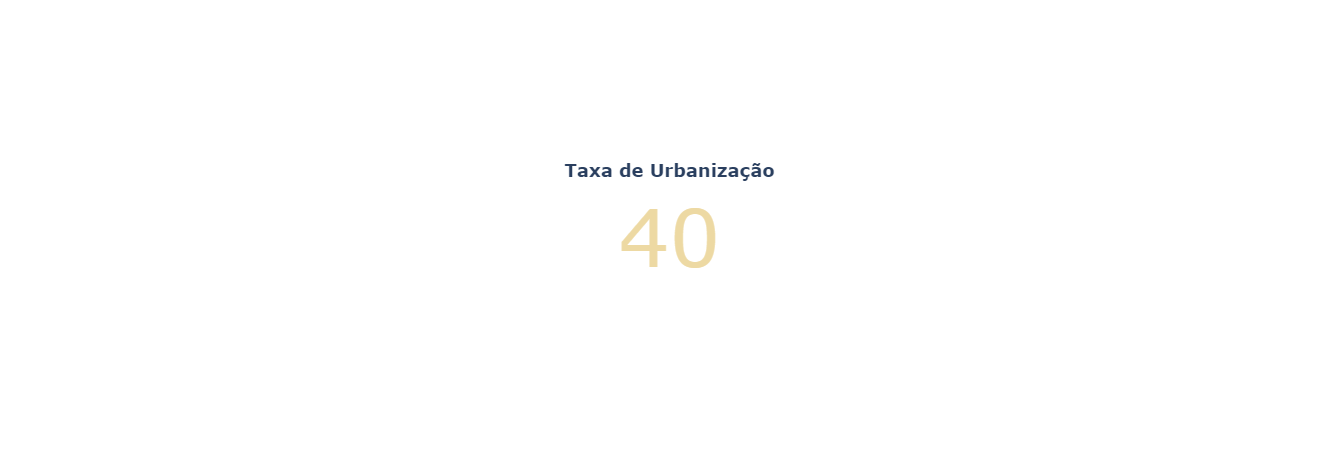

In [106]:
indicator = plot_urbanization_index(urb_indicator=40)

indicator

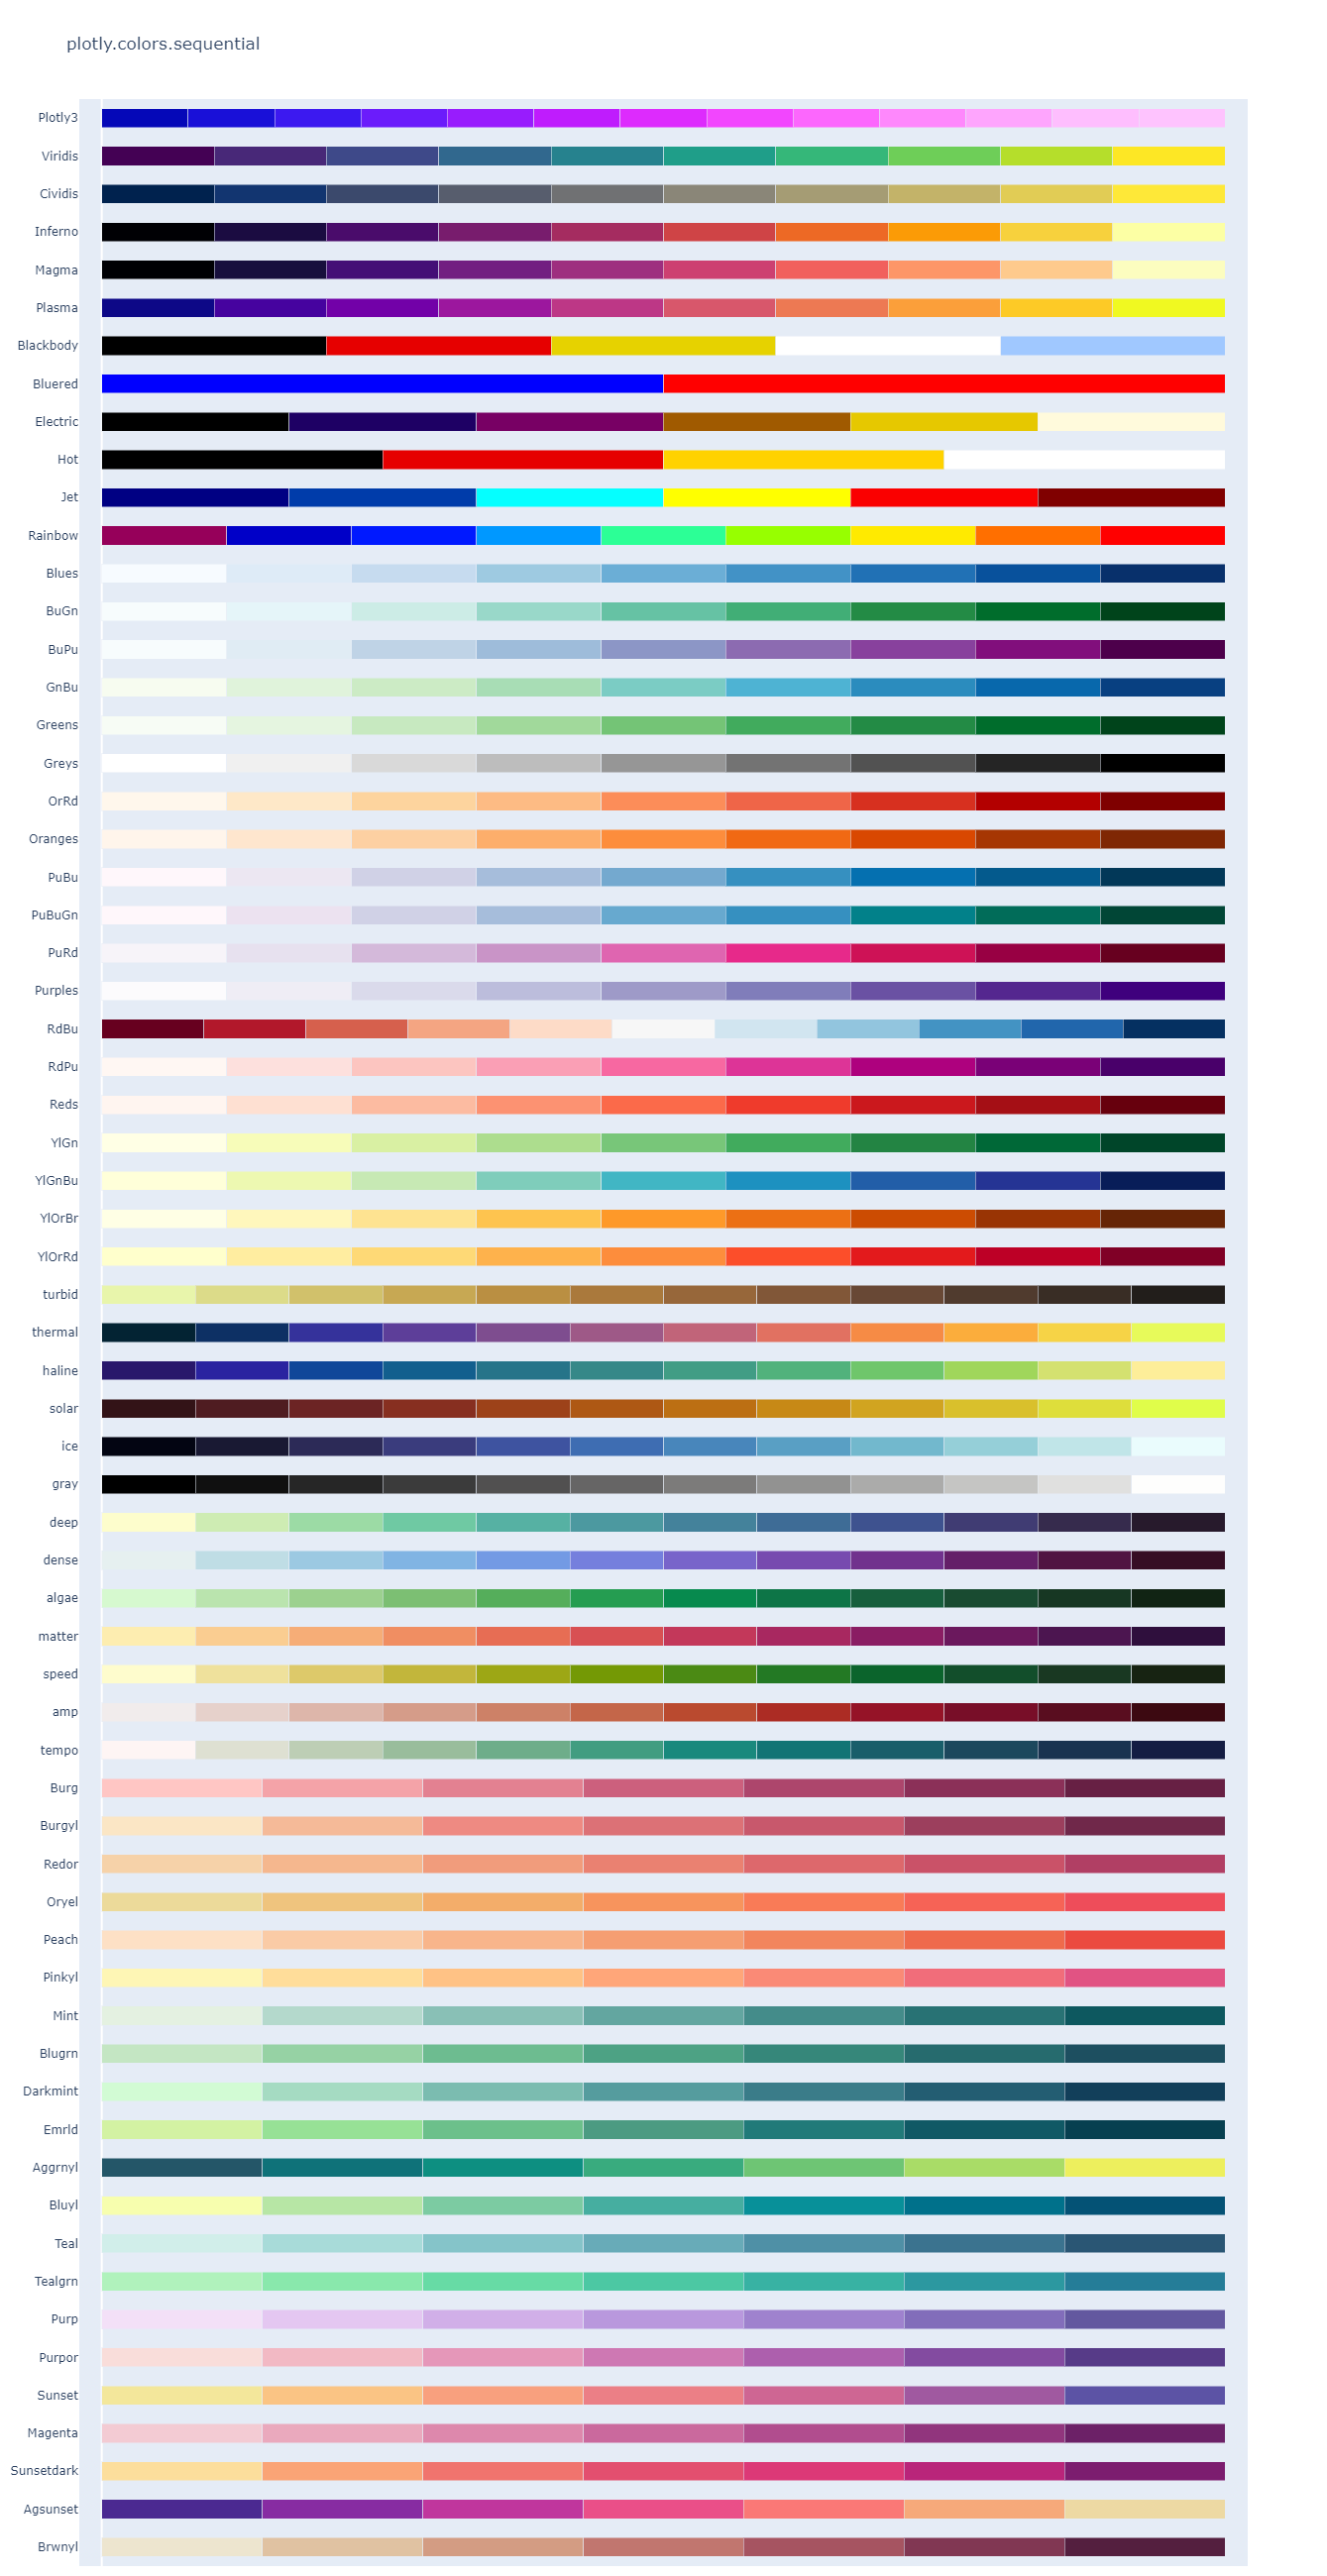

In [56]:
px.colors.sequential.swatches()